<ipython-input-4-3c81bf2ef863>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


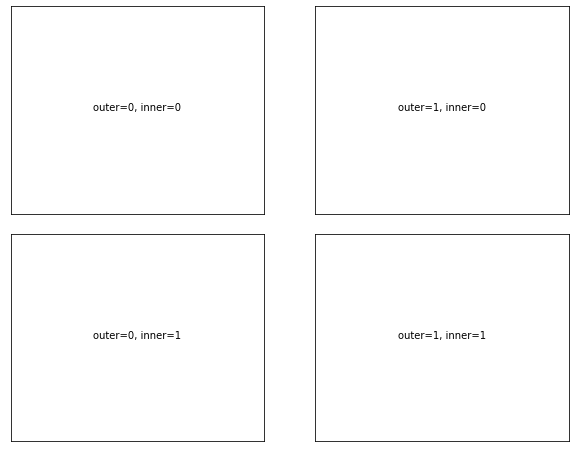

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 8))
outer = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.2)

for i in range(2):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)

    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        t = ax.text(0.5,0.5, 'outer=%d, inner=%d' % (i,j))
        t.set_ha('center')
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

fig.show()

In [13]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import glob
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [14]:
start_time = datetime.now()
all_csv = glob.glob(f'../data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/**/*.csv', recursive=True)
end_time = datetime.now()
print(f'Loaded the paths of {len(all_csv)} files from disk. Took {end_time-start_time}')

Loaded the paths of 100 files from disk. Took 0:00:00.003730


In [15]:
df = pd.read_csv(all_csv[0])
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df_indexed = df.set_index('timestamp')

In [17]:
# prepare data for standardization
values = df_indexed.copy()
values = values.drop(columns=['is_anomaly'],axis=1)
#values = values.reshape((len(values), 1))

# train the standardization
scaler2 = StandardScaler()
scaler2 = scaler2.fit(values)
#print('Mean: %f, StandardDeviation: %f' % (scaler2.mean_, sqrt(scaler2.var_)))
# standardize the dataset
standardaized = scaler2.transform(values)

In [24]:
df_indexed['std_value'] = standardaized

In [25]:
result_add = seasonal_decompose(df_indexed['std_value'], model='additive', extrapolate_trend='freq')

In [26]:
resdf = result_add.resid

In [27]:
resdf

timestamp
2014-11-23 07:00:00    0.007187
2014-11-23 08:00:00   -0.132676
2014-11-23 09:00:00    0.089729
2014-11-23 10:00:00    0.078692
2014-11-23 11:00:00    0.022993
                         ...   
2015-01-21 07:00:00   -0.064768
2015-01-21 08:00:00   -0.342898
2015-01-21 09:00:00   -0.032173
2015-01-21 10:00:00    0.069384
2015-01-21 11:00:00   -0.019413
Name: resid, Length: 1421, dtype: float64